<a href="https://colab.research.google.com/github/randy-tsukemen/Data_science_roadmap/blob/master/Boats_Model_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"minoii","key":"a7e522c42ebf9f5fc48d005da8a846b6"}'}

In [3]:
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge               COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-06-19 00:27:19            814  
roche-data-science-coalition/uncover                            UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53           3511  
kwullum/fatal-police-shootings-in-the-us                        Fatal Police Shootings in the US                      1MB  2017-09-22 19:18:21          16120  
Cornell-University/arxiv                                        ArXiv Metadata                                        2GB  2020-05-06 23:18:35            100  
sudalairajkumar/daily-temperature-of-maj

In [5]:
! kaggle competitions download -c 'name-of-competition'

404 - Not Found


In [6]:
!kaggle datasets download -d clorichel/boat-types-recognition

 99% 837M/842M [00:10<00:00, 62.6MB/s]
100% 842M/842M [00:10<00:00, 86.0MB/s]


In [7]:
!unzip /content/boat-types-recognition.zip -d /content/images

Archive:  /content/boat-types-recognition.zip
  inflating: /content/images/boats/buoy/alaska-ocean-warning-light-sea-2574393.jpg  
  inflating: /content/images/boats/buoy/anchor-warp-rope-buoy-beach-2881563.jpg  
  inflating: /content/images/boats/buoy/beach-buoy-w-water-sea-ocean-1042883.jpg  
  inflating: /content/images/boats/buoy/beacon-lighthouse-coast-navigation-39232.jpg  
  inflating: /content/images/boats/buoy/blue-boat-buoy-floating-2834157.jpg  
  inflating: /content/images/boats/buoy/blue-buoy-float-navigation-ocean-20511.jpg  
  inflating: /content/images/boats/buoy/boat-water-bird-beach-sand-2840152.jpg  
  inflating: /content/images/boats/buoy/bojka-buoy-water-bojka-rescue-882679.jpg  
  inflating: /content/images/boats/buoy/buoy-beach-sea-buoys-scenic-242727.jpg  
  inflating: /content/images/boats/buoy/buoy-beacon-sea-beach-sand-2266571.jpg  
  inflating: /content/images/boats/buoy/buoy-beacon-water-blue-yellow-1661196.jpg  
  inflating: /content/images/boats/buoy/buoy

In [8]:
import torch
from collections import Counter
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import os
from glob import glob
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Data science tools
import numpy as np
import pandas as pd
import os

# Image manipulations
from PIL import Image

from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

In [9]:
ImagePATH = f"images/"
categories = glob(ImagePATH+"*")

In [10]:
categories

['images/cruise ship',
 'images/boats',
 'images/buoy',
 'images/gondola',
 'images/ferry boat',
 'images/paper boat',
 'images/kayak',
 'images/sailboat',
 'images/inflatable boat',
 'images/freight boat']

In [11]:
filedf = pd.DataFrame()
for cat in categories:
    files = glob(cat+"/*")
    tempdf = pd.DataFrame({'filepath':files,'category':cat.split("/")[-1]})
    filedf = pd.concat([filedf,tempdf])
filedf.head()

filepath     category
0  images/cruise ship/my-ship-cruise-caribbean-36...  cruise ship
1  images/cruise ship/vision-the-seas-cozumel-cru...  cruise ship
2  images/cruise ship/cruise-ship-aidamar-ship-cr...  cruise ship
3  images/cruise ship/ship-port-water-technology-...  cruise ship
4  images/cruise ship/cruise-ship-disney-cruise-l...  cruise ship

In [12]:
gby_cnt = filedf.groupby("category").aggregate('count').rename(columns = {'filepath':'cnt'}).reset_index().sort_values(by='cnt',ascending=False)

In [13]:
px.bar(gby_cnt,x = 'category',y = 'cnt',color = 'category',title = 'Counts from Each Category')

In [14]:
focus_cats = gby_cnt[gby_cnt['cnt'] >=40]['category'].values

In [15]:
filedf  = filedf[filedf['category'].isin(focus_cats)]

In [16]:
filedf.category.value_counts()

sailboat       488
kayak          254
gondola        242
cruise ship    239
ferry boat      81
buoy            68
paper boat      40
Name: category, dtype: int64

In [17]:


X_train, X_test, _, _ = train_test_split(
        filedf, filedf['category'],stratify=filedf['category'], test_size=0.4)

X_test, X_val, _, _ = train_test_split(
        X_test, X_test['category'], stratify=X_test['category'], test_size=0.5)



In [18]:


X_train['type'] = 'train'
X_val['type'] = 'val'
X_test['type'] = 'test'



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:


fulldf = pd.concat([X_train,X_test,X_val])



In [20]:
fulldf.type.value_counts()

train    847
val      283
test     282
Name: type, dtype: int64

In [21]:
fulldf.head()

filepath     category   type
183  images/kayak/kayak-canoe-boat-kayaks-rafting-2...        kayak  train
58   images/ferry boat/ferry-ferry-boat-car-ferry-9...   ferry boat  train
416  images/sailboat/archipelago-sailboat-mast-boat...     sailboat  train
141  images/cruise ship/ship-cruise-ship-cruise-vac...  cruise ship  train
145     images/gondola/venice-venezia-italy-203467.jpg      gondola  train

In [22]:
fulldf.category.value_counts()[0]/len(fulldf)

0.34560906515580736

In [23]:
!mkdir /content/data
!mkdir /content/data/train
!mkdir /content/data/test
!mkdir /content/data/val

In [24]:
for cat in fulldf.category.unique():
    os.system(f"mkdir data/train/'{cat}'") 
    os.system(f"mkdir data/test/'{cat}'") 
    os.system(f"mkdir data/val/'{cat}'")

In [25]:
fulldf.head()

filepath     category   type
183  images/kayak/kayak-canoe-boat-kayaks-rafting-2...        kayak  train
58   images/ferry boat/ferry-ferry-boat-car-ferry-9...   ferry boat  train
416  images/sailboat/archipelago-sailboat-mast-boat...     sailboat  train
141  images/cruise ship/ship-cruise-ship-cruise-vac...  cruise ship  train
145     images/gondola/venice-venezia-italy-203467.jpg      gondola  train

In [26]:


for i,row in fulldf.iterrows():
    # Boat category
    cat = row['category']
    # section is train,val or test
    section = row['type']
    # input filepath to copy
    ipath = row['filepath']
    # output filepath to paste
    opath = ipath.replace(f"images/",f"data/{section}/")
    # running the cp command
    os.system(f"cp '{ipath}' '{opath}'")



In [27]:


import torch
from collections import Counter
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import os
from glob import glob
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import models
import torch.nn as nn
#from torchsummary import summary
from torchvision import transforms, datasets, models
import torch
from torch import optim, cuda
from torch.utils.data import DataLoader, sampler
import torch.nn as nn
import numpy as np
import tqdm



In [28]:


import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Data science tools
import numpy as np
import pandas as pd
import os

# Image manipulations
from PIL import Image

from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14



In [29]:
from torch import Tensor, nn
from torch.nn.functional import interpolate

In [30]:
def imshow_tensor(image, ax=None, title=None):
    """Imshow for Tensor."""

    if ax is None:
        fig, ax = plt.subplots()

    # Set the color channel as the third dimension
    image = image.numpy().transpose((1, 2, 0))

    # Reverse the preprocessing steps
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Clip the image pixel values
    image = np.clip(image, 0, 1)

    ax.imshow(image)
    plt.axis('off')

    return ax, image

In [31]:
traindir = f"data/train"
validdir = f"data/val"
testdir = f"data/test"

In [32]:
save_file_name = f'resnet50-transfer.pt'
checkpoint_path = f'resnet50-transfer.pth'

# Change to fit hardware
batch_size = 512

# Whether to train on a gpu
train_on_gpu = cuda.is_available()
print(f'Train on gpu: {train_on_gpu}')

# Number of gpus
if train_on_gpu:
    gpu_count = cuda.device_count()
    print(f'{gpu_count} gpus detected.')
    if gpu_count > 1:
        multi_gpu = True
    else:
        multi_gpu = False
# print(train_on_gpu,multi_gpu)

Train on gpu: True
1 gpus detected.


In [33]:
# Image transformations
image_transforms = {
    # Train uses data augmentation
    'train':
    transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),  # Image net standards
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])  # Imagenet standards
    ]),
    # Validation does not use augmentation
    'valid':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    
        # Test does not use augmentation
    'test':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

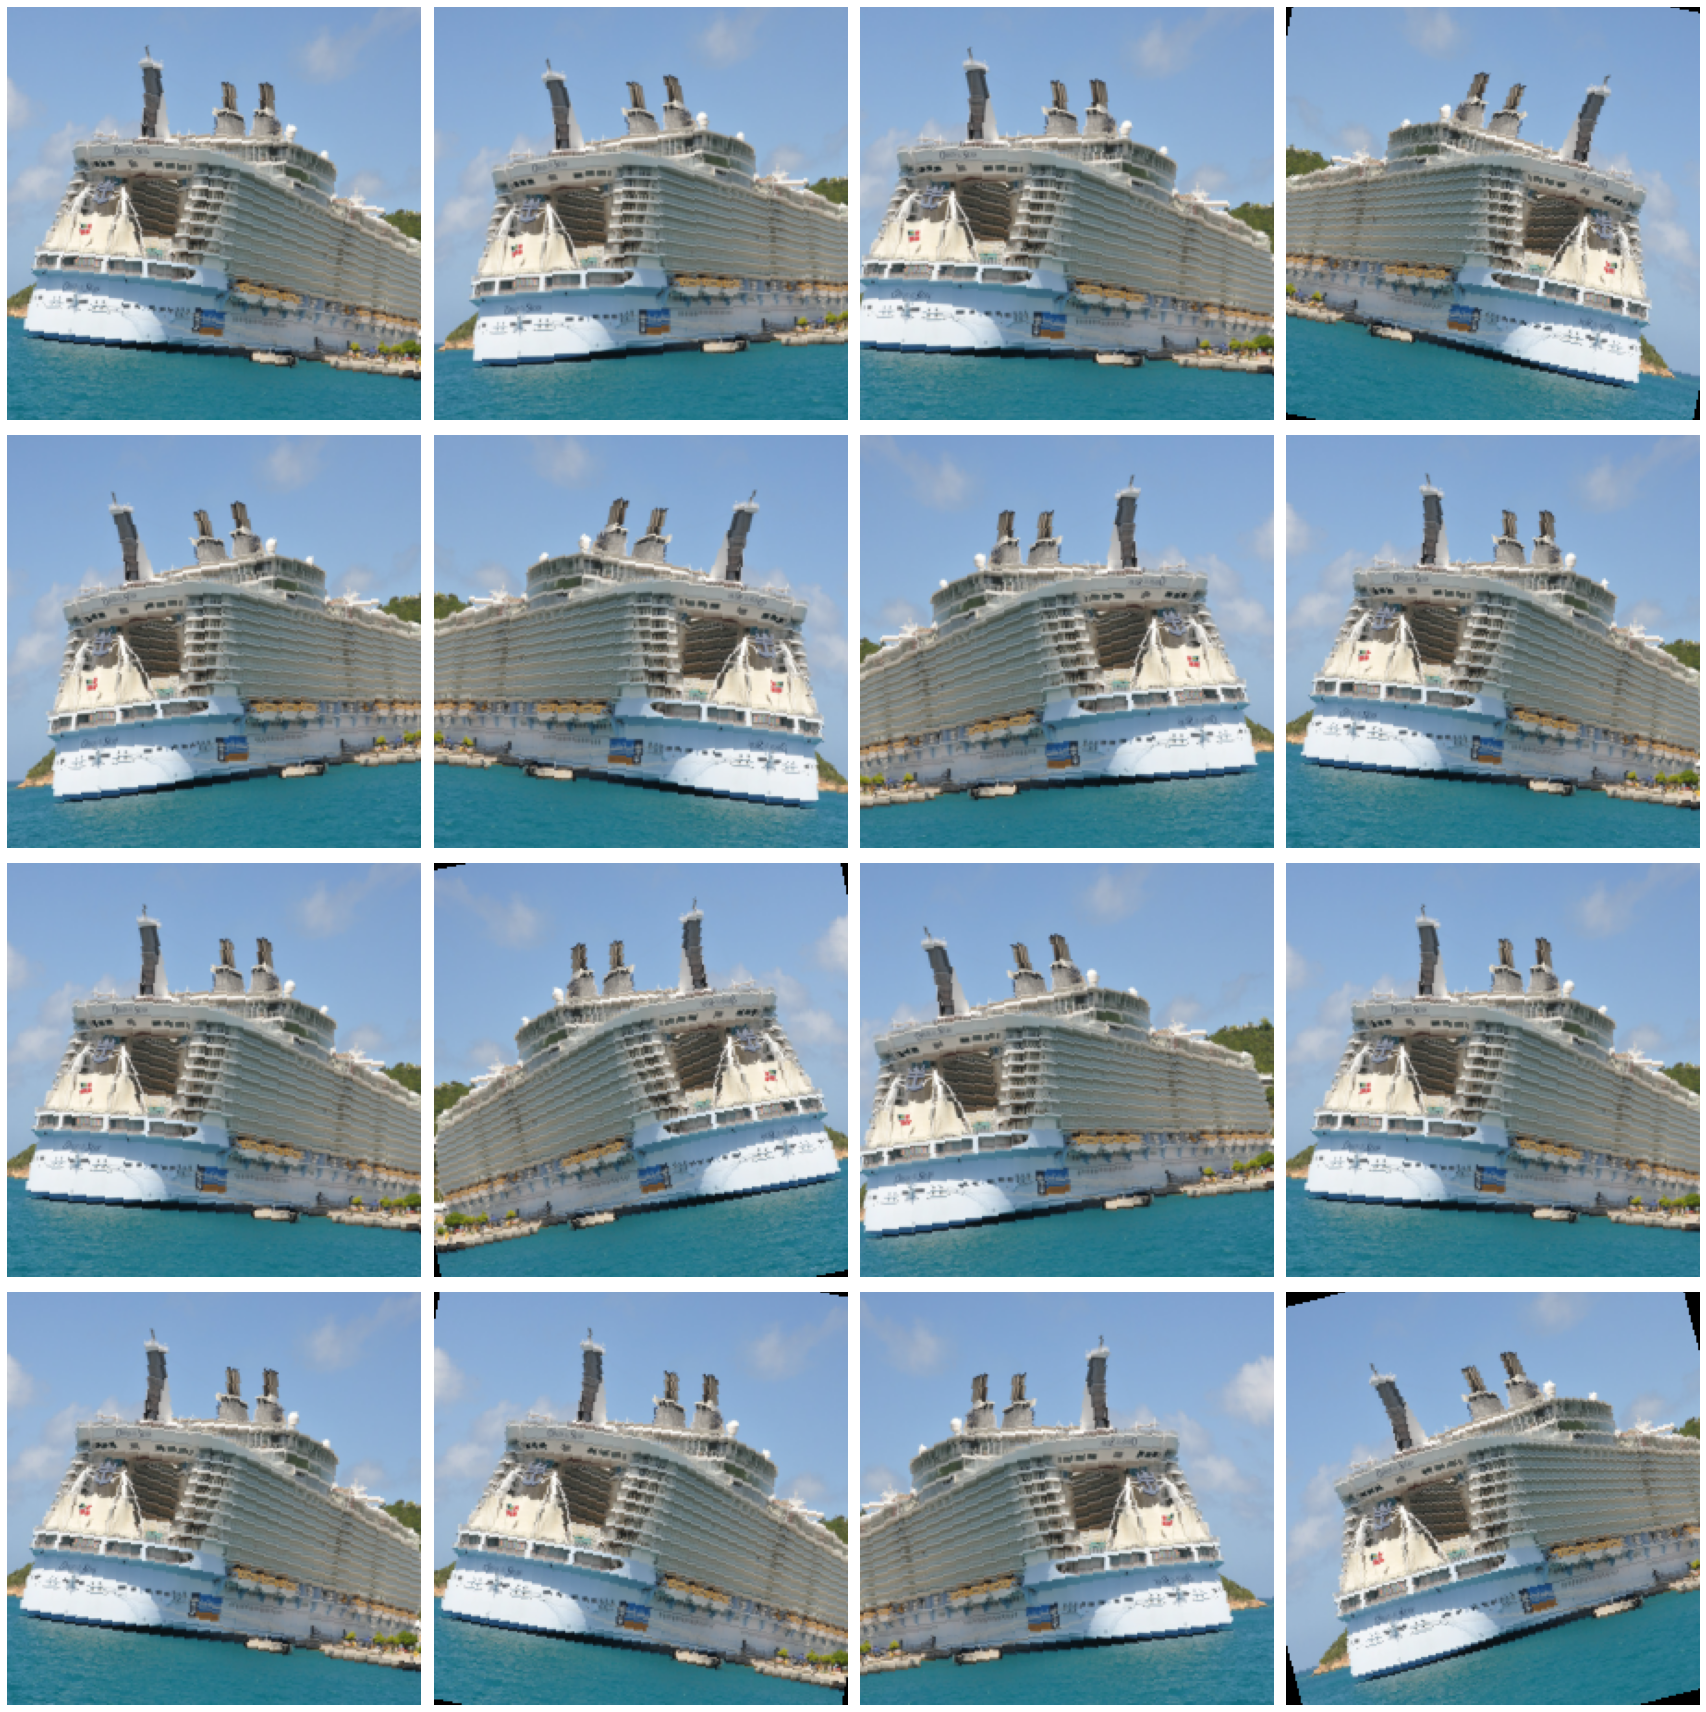

In [34]:
ex_img = Image.open('/content/data/train/cruise ship/cruise-ship-oasis-of-the-seas-boat-water-482183.jpg')

t = image_transforms['train']
plt.figure(figsize=(24, 24))

for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    _ = imshow_tensor(t(ex_img), ax=ax)

plt.tight_layout()

In [35]:
# Datasets from folders
data = {
    'train':
    datasets.ImageFolder(root=traindir, transform=image_transforms['train']),
    'valid':
    datasets.ImageFolder(root=validdir, transform=image_transforms['valid']),
    'test':
    datasets.ImageFolder(root=testdir, transform=image_transforms['test'])
}

# Dataloader iterators, make sure to shuffle
dataloaders = {
    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=True,num_workers=10),
    'val': DataLoader(data['valid'], batch_size=batch_size, shuffle=True,num_workers=10),
    'test': DataLoader(data['test'], batch_size=batch_size, shuffle=True,num_workers=10)
}

In [36]:
# Iterate through the dataloader once
trainiter = iter(dataloaders['train'])
features, labels = next(trainiter)
features.shape, labels.shape

(torch.Size([512, 3, 224, 224]), torch.Size([512]))

In [37]:
categories = []
for d in os.listdir(traindir):
    categories.append(d)
    
n_classes = len(categories)
print(f'There are {n_classes} different classes.')

There are 7 different classes.


In [38]:
class_to_idx = data['train'].class_to_idx
idx_to_class = {
    idx: class_
    for class_, idx in data['train'].class_to_idx.items()
}

train_cnts = Counter([idx_to_class[x] for x in data['train'].targets])
val_cnts = Counter([idx_to_class[x] for x in data['valid'].targets])
test_cnts = Counter([idx_to_class[x] for x in data['test'].targets])

train_cnts = pd.DataFrame({'cat' :list(train_cnts.keys()), 'train_cnt': list(train_cnts.values())})
val_cnts = pd.DataFrame({'cat' :list(val_cnts.keys()), 'val_cnt': list(val_cnts.values())})
test_cnts = pd.DataFrame({'cat' :list(test_cnts.keys()), 'test_cnt': list(test_cnts.values())})

cnt_df = pd.merge(train_cnts,val_cnts,on='cat',how='left').merge(test_cnts,on='cat',how='left')
cnt_df.head()

cat  train_cnt  val_cnt  test_cnt
0         buoy         41       13        14
1  cruise ship        143       48        48
2   ferry boat         49       16        16
3      gondola        145       49        48
4        kayak        152       51        51

In [39]:
model = models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [40]:
# Freeze model weights
for param in model.parameters():
    param.requires_grad = False

In [41]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [42]:
n_inputs = model.fc.in_features

In [43]:
model.fc = nn.Sequential(
                      nn.Linear(n_inputs, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, n_classes),                   
                      nn.LogSoftmax(dim=1))

In [44]:
model.fc

Sequential(
  (0): Linear(in_features=2048, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=256, out_features=7, bias=True)
  (4): LogSoftmax()
)

In [45]:
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

24,034,375 total parameters.
526,343 training parameters.


In [46]:
if train_on_gpu:
    model = model.to('cuda')

if multi_gpu:
    model = nn.DataParallel(model)

In [47]:
if multi_gpu:
    print(model.module.fc)
else:
    print(model.fc)

Sequential(
  (0): Linear(in_features=2048, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=256, out_features=7, bias=True)
  (4): LogSoftmax()
)


In [48]:
model.class_to_idx = data['train'].class_to_idx
model.idx_to_class = {
    idx: class_
    for class_, idx in model.class_to_idx.items()
}

list(model.idx_to_class.items())[:10]

[(0, 'buoy'),
 (1, 'cruise ship'),
 (2, 'ferry boat'),
 (3, 'gondola'),
 (4, 'kayak'),
 (5, 'paper boat'),
 (6, 'sailboat')]

In [49]:


criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())



In [50]:
for p in optimizer.param_groups[0]['params']:
    if p.requires_grad:
        print(p.shape)

torch.Size([256, 2048])
torch.Size([256])
torch.Size([7, 256])
torch.Size([7])


In [51]:
def train(model,
          criterion,
          optimizer,
          train_loader,
          valid_loader,
          save_file_name,
          max_epochs_stop=3,
          n_epochs=20,
          print_every=1):
    """Train a PyTorch Model

    Params
    --------
        model (PyTorch model): cnn to train
        criterion (PyTorch loss): objective to minimize
        optimizer (PyTorch optimizier): optimizer to compute gradients of model parameters
        train_loader (PyTorch dataloader): training dataloader to iterate through
        valid_loader (PyTorch dataloader): validation dataloader used for early stopping
        save_file_name (str ending in '.pt'): file path to save the model state dict
        max_epochs_stop (int): maximum number of epochs with no improvement in validation loss for early stopping
        n_epochs (int): maximum number of training epochs
        print_every (int): frequency of epochs to print training stats

    Returns
    --------
        model (PyTorch model): trained cnn with best weights
        history (DataFrame): history of train and validation loss and accuracy
    """

    # Early stopping intialization
    epochs_no_improve = 0
    valid_loss_min = np.Inf

    valid_max_acc = 0
    history = []

    # Number of epochs already trained (if using loaded in model weights)
    try:
        print(f'Model has been trained for: {model.epochs} epochs.\n')
    except:
        model.epochs = 0
        print(f'Starting Training from Scratch.\n')

    overall_start = timer()

    # Main loop
    for epoch in range(n_epochs):

        # keep track of training and validation loss each epoch
        train_loss = 0.0
        valid_loss = 0.0

        train_acc = 0
        valid_acc = 0

        # Set to training
        model.train()
        start = timer()

        # Training loop
        for ii, (data, target) in enumerate(train_loader):
            # Tensors to gpu
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()

            # Clear gradients
            optimizer.zero_grad()
            # Predicted outputs are log probabilities
            output = model(data)

            # Loss and backpropagation of gradients
            loss = criterion(output, target)
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Track train loss by multiplying average loss by number of examples in batch
            train_loss += loss.item() * data.size(0)

            # Calculate accuracy by finding max log probability
            _, pred = torch.max(output, dim=1)
            correct_tensor = pred.eq(target.data.view_as(pred))
            # Need to convert correct tensor from int to float to average
            accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
            # Multiply average accuracy times the number of examples in batch
            train_acc += accuracy.item() * data.size(0)

            # Track training progress
            print(
                f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete. {timer() - start:.2f} seconds elapsed in epoch.',
                end='\r')

        # After training loops ends, start validation
        else:
            model.epochs += 1

            # Don't need to keep track of gradients
            with torch.no_grad():
                # Set to evaluation mode
                model.eval()

                # Validation loop
                for data, target in valid_loader:
                    # Tensors to gpu
                    if train_on_gpu:
                        data, target = data.cuda(), target.cuda()

                    # Forward pass
                    output = model(data)

                    # Validation loss
                    loss = criterion(output, target)
                    # Multiply average loss times the number of examples in batch
                    valid_loss += loss.item() * data.size(0)

                    # Calculate validation accuracy
                    _, pred = torch.max(output, dim=1)
                    correct_tensor = pred.eq(target.data.view_as(pred))
                    accuracy = torch.mean(
                        correct_tensor.type(torch.FloatTensor))
                    # Multiply average accuracy times the number of examples
                    valid_acc += accuracy.item() * data.size(0)

                # Calculate average losses
                train_loss = train_loss / len(train_loader.dataset)
                valid_loss = valid_loss / len(valid_loader.dataset)

                # Calculate average accuracy
                train_acc = train_acc / len(train_loader.dataset)
                valid_acc = valid_acc / len(valid_loader.dataset)

                history.append([train_loss, valid_loss, train_acc, valid_acc])

                # Print training and validation results
                if (epoch + 1) % print_every == 0:
                    print(
                        f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}'
                    )
                    print(
                        f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%'
                    )

                # Save the model if validation loss decreases
                if valid_loss < valid_loss_min:
                    # Save model
                    torch.save(model.state_dict(), save_file_name)
                    # Track improvement
                    epochs_no_improve = 0
                    valid_loss_min = valid_loss
                    valid_best_acc = valid_acc
                    best_epoch = epoch

                # Otherwise increment count of epochs with no improvement
                else:
                    epochs_no_improve += 1
                    # Trigger early stopping
                    if epochs_no_improve >= max_epochs_stop:
                        print(
                            f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
                        )
                        total_time = timer() - overall_start
                        print(
                            f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
                        )

                        # Load the best state dict
                        model.load_state_dict(torch.load(save_file_name))
                        # Attach the optimizer
                        model.optimizer = optimizer

                        # Format history
                        history = pd.DataFrame(
                            history,
                            columns=[
                                'train_loss', 'valid_loss', 'train_acc',
                                'valid_acc'
                            ])
                        return model, history

    # Attach the optimizer
    model.optimizer = optimizer
    # Record overall time and print out stats
    total_time = timer() - overall_start
    print(
        f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
    )
    print(
        f'{total_time:.2f} total seconds elapsed. {total_time / (epoch):.2f} seconds per epoch.'
    )
    # Format history
    history = pd.DataFrame(
        history,
        columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])
    return model, history

In [52]:
model, history = train(
    model,
    criterion,
    optimizer,
    dataloaders['train'],
    dataloaders['val'],
    save_file_name=save_file_name,
    max_epochs_stop=3,
    n_epochs=100,
    print_every=1)

Starting Training from Scratch.


Epoch: 0 	Training Loss: 1.9472 	Validation Loss: 1.5622
		Training Accuracy: 25.50%	 Validation Accuracy: 32.86%

Epoch: 1 	Training Loss: 1.6776 	Validation Loss: 1.3689
		Training Accuracy: 33.18%	 Validation Accuracy: 55.48%

Epoch: 2 	Training Loss: 1.4671 	Validation Loss: 1.1610
		Training Accuracy: 49.00%	 Validation Accuracy: 59.72%

Epoch: 3 	Training Loss: 1.2958 	Validation Loss: 1.0065
		Training Accuracy: 50.65%	 Validation Accuracy: 73.85%

Epoch: 4 	Training Loss: 1.1232 	Validation Loss: 0.8884
		Training Accuracy: 66.47%	 Validation Accuracy: 81.27%

Epoch: 5 	Training Loss: 1.0311 	Validation Loss: 0.8186
		Training Accuracy: 73.44%	 Validation Accuracy: 82.33%

Epoch: 6 	Training Loss: 0.9311 	Validation Loss: 0.7318
		Training Accuracy: 75.09%	 Validation Accuracy: 82.33%

Epoch: 7 	Training Loss: 0.8407 	Validation Loss: 0.6581
		Training Accuracy: 75.91%	 Validation Accuracy: 81.98%

Epoch: 8 	Training Loss: 0.7741 	Validation Lo

Text(0.5, 1.0, 'Training and Validation Losses')

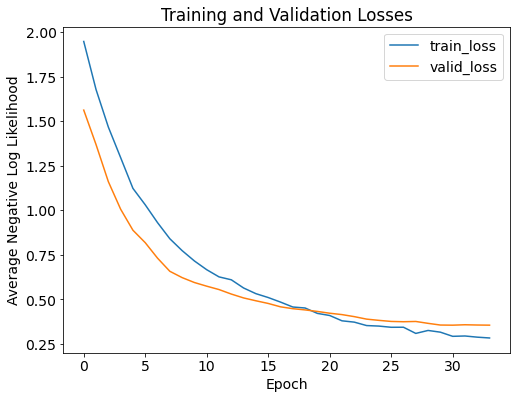

In [53]:
plt.figure(figsize=(8, 6))
for c in ['train_loss', 'valid_loss']:
    plt.plot(
        history[c], label=c)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Negative Log Likelihood')
plt.title('Training and Validation Losses')

Text(0.5, 1.0, 'Training and Validation Accuracy')

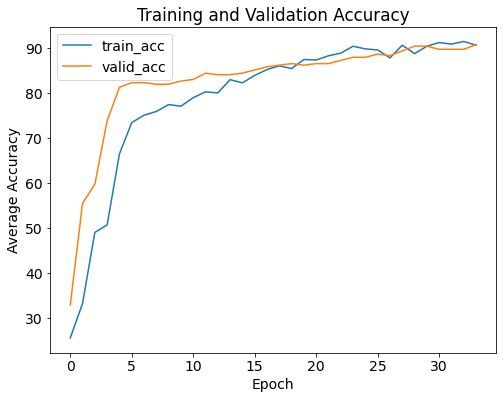

In [54]:


plt.figure(figsize=(8, 6))
for c in ['train_acc', 'valid_acc']:
    plt.plot(
        100 * history[c], label=c)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Accuracy')
plt.title('Training and Validation Accuracy')

